
# Проект "Игры — Анализ рекламных источников"

Описание проекта:
Целью данного проекта является анализ поведения игроков в мобильной игре "Космические братья" в зависимости от источника перехода. Проект предполагает проведение исследовательского анализа данных, анализ влияния источника перехода на поведение пользователей, а также проверку статистических гипотез.

### Шаг 1. Подготовка данных

- Импортировать необходимые датасеты: ad_costs.csv, game_actions.csv, user_source.csv.
- Ознакомиться с данными и понять их структуру.

In [1]:
# Импорт библиотеки pandas и сокращение её до pd
import pandas as pd
# Импортируем библиотеку для работы с датами
from datetime import datetime
# Импорт библиотеки для создания графиков
import matplotlib.pyplot as plt
# Импортируем функцию ttest_ind из библиотеки SciPy для выполнения t-теста
from scipy.stats import ttest_ind

In [2]:
# Загрузка датасета ad_costs.csv
ad_costs_url = 'https://code.s3.yandex.net/datasets/ad_costs.csv'
ad_costs = pd.read_csv(ad_costs_url)

# Просмотр информации о структуре и типах данных в датасете ad_costs
print(ad_costs.info())
print()  # Добавим пустую строку для разделения

# Загрузка датасета game_actions.csv
game_actions_url = 'https://code.s3.yandex.net/datasets/game_actions.csv'
game_actions = pd.read_csv(game_actions_url)

# Просмотр информации о структуре и типах данных в датасете game_actions
print(game_actions.info())
print()  # Добавим пустую строку для разделения

# Загрузка датасета user_source.csv
user_source_url = 'https://code.s3.yandex.net/datasets/user_source.csv'
user_source = pd.read_csv(user_source_url)

# Просмотр информации о структуре и типах данных в датасете user_source
print(user_source.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----

В датасете game_actions.csv обнаружил пропущенные значения в некоторых столбцах, например, в столбцах 'building_type' и 'project_type'. Учитывая, что эта игра имеет различные типы событий, возможно, отсутствие значений в этих столбцах может означать, что не для всех событий указаны конкретные типы зданий или проектов. Принял решение не вносить изменения в эти пропущенные значения, так как они могут нести определенный смысл и быть важными для анализа. Если появится необходимость,готов рассмотреть альтернативные способы обработки пропущенных значений.

### Шаг 2. Предобработка данных

- Обработать пропущенные значения в датасетах, при необходимости.
- Удалить дубликаты, если они есть.
- Преобразовать форматы дат в стандартный формат.
- Выполнить объединение данных, где это необходимо (например, объединение по user_id).

**Обрабатываем пропущенные значения в датасетах, при необходимости.**

In [3]:
# Проверка наличия дубликатов в датасетах

# Для ad_costs.csv
if ad_costs.duplicated().sum() > 0:
    print("В датасете ad_costs есть дубликаты.")
else:
    print("В датасете ad_costs нет дубликатов.")

# Для game_actions.csv
if game_actions.duplicated().sum() > 0:
    print("В датасете game_actions есть дубликаты.")
else:
    print("В датасете game_actions нет дубликатов.")

# Для user_source.csv
if user_source.duplicated().sum() > 0:
    print("В датасете user_source есть дубликаты.")
else:
    print("В датасете user_source нет дубликатов.")

В датасете ad_costs нет дубликатов.
В датасете game_actions есть дубликаты.
В датасете user_source нет дубликатов.


**Удаляем дубликаты, если они есть**.

In [4]:
# Удаление дубликатов в датасете game_actions
game_actions = game_actions.drop_duplicates()

**Преобразуем форматы дат в стандартный формат.**

In [5]:
# Преобразование формата дат в столбце 'day' в тип datetime
ad_costs['day'] = pd.to_datetime(ad_costs['day'])
# Преобразование формата дат в столбце 'event_datetime' в тип datetime
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'])

**Выполняем объединение данных по user_id.**

In [6]:
# Объединение данных по столбцу 'user_id'
merged_data = game_actions.merge(user_source, on='user_id', how='inner')

### Шаг 3. Исследовательский анализ данных

- Построить диаграмму распределения количества построенных объектов (building_type) в игре.
- Построить индикатор количества пользователей на основе уникальных user_id.
- Построить гистограмму распределения событий по временным периодам из датасета game_actions.csv.
- Построить гистограмму распределения пользователей по различным источникам (source) из датасета user_source.csv.

**Строим диаграмму распределения количества построенных объектов (building_type) в игре.**

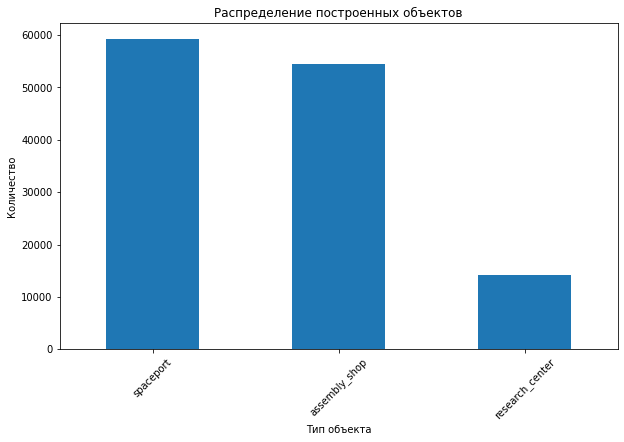

In [7]:
# Группировка данных по типу построенных объектов и подсчет их количества
building_counts = merged_data['building_type'].value_counts()

# Создание нового графика с заданным размером
plt.figure(figsize=(10, 6))

# Построение столбчатой диаграммы на основе подсчитанных значений
building_counts.plot(kind='bar')

# Заголовок графика
plt.title('Распределение построенных объектов')

# Название оси X
plt.xlabel('Тип объекта')

# Название оси Y
plt.ylabel('Количество')

# Поворот подписей на оси X для лучшей читаемости
plt.xticks(rotation=45)

# Отображение графика
plt.show()

В результате анализа распределения построенных объектов (building_type) в игре "Космические братья", было обнаружено, что большинство игроков предпочитают строить объекты типа 'spaceport' (59325), за которыми следует 'assembly_shop' (54494). Количество построенных объектов типа 'research_center' (14137) оказалось наименьшим. 

**Строим индикатор количества пользователей на основе уникальных user_id.**

In [8]:
# Подсчет количества уникальных пользователей
unique_users_count = merged_data['user_id'].nunique()

# Вывод индикатора
print(f"Индикатор количества уникальных пользователей: {unique_users_count}")

Индикатор количества уникальных пользователей: 13576


Исходя из анализа данных, мы можем сделать вывод, что в игре "Космические братья" приняло участие 13576 уникальных пользователей. Это число представляет собой количество различных игроков, которые взаимодействовали с игрой в данном периоде.

**Строим гистограмму распределения событий по временным периодам из датасета game_actions.csv.**

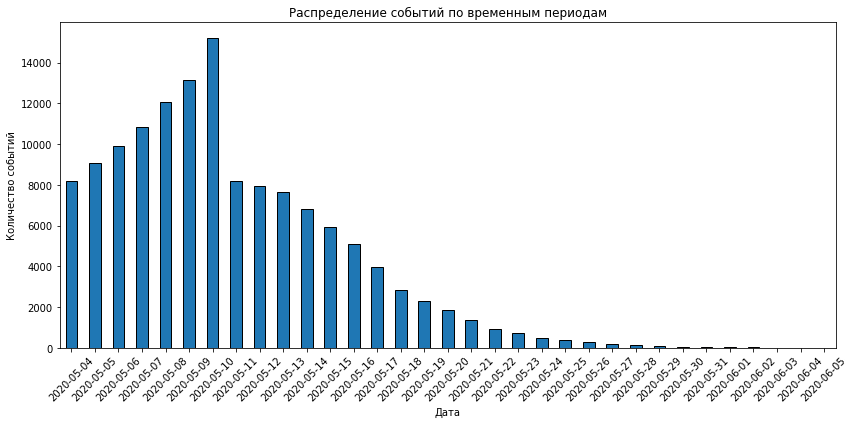

In [9]:
# Извлечение даты из datetime
game_actions['date'] = game_actions['event_datetime'].dt.date

# Группировка данных по дате и подсчет событий в каждом дне
events_per_date = game_actions.groupby('date')['event'].count()

# Создание нового графика с заданным размером
plt.figure(figsize=(12, 6))

# Построение графика распределения событий по временным периодам
events_per_date.plot(kind='bar', edgecolor='black')

# Заголовок графика
plt.title('Распределение событий по временным периодам')

# Название оси X
plt.xlabel('Дата')

# Название оси Y
plt.ylabel('Количество событий')

# Установка меток для оси X
plt.xticks(rotation=45)

# Увеличение масштаба графика
plt.tight_layout()

# Отображение графика
plt.show()


На основе данных о событиях в игре "Космические братья" была построена гистограмма распределения событий по временным периодам. Анализ данного распределения позволил выявить динамику активности пользователей. Начиная с 4 мая 2020 года, количество событий достигло пика к 10 маю, а затем постепенно снижалось.

**Строим гистограмму распределения пользователей по различным источникам (source) из датасета user_source.csv.**

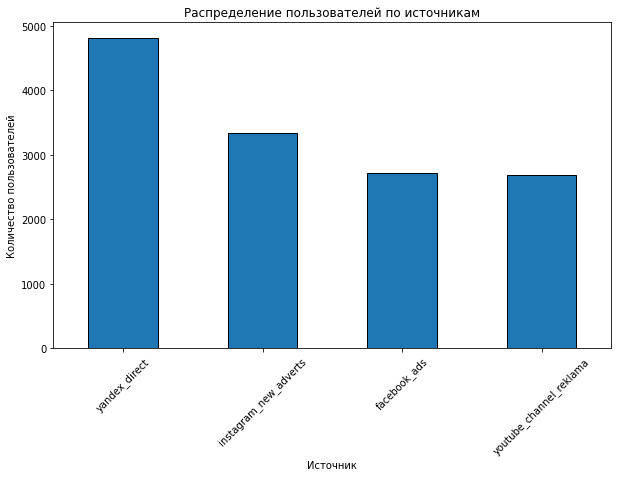

In [10]:
# Группировка данных по источнику и подсчет уникальных пользователей для каждого источника
users_per_source = user_source.groupby('source')['user_id'].nunique()

# Сортировка данных по убыванию количества пользователей
users_per_source_sorted = users_per_source.sort_values(ascending=False)

# Создание нового графика
plt.figure(figsize=(10, 6))

# Построение гистограммы распределения пользователей по источникам (в порядке убывания)
users_per_source_sorted.plot(kind='bar', edgecolor='black')

# Заголовок графика
plt.title('Распределение пользователей по источникам')

# Название оси X
plt.xlabel('Источник')

# Название оси Y
plt.ylabel('Количество пользователей')

# Установка меток для оси X
plt.xticks(rotation=45)

# Отображение графика
plt.show()

Исходя из анализа данных о распределении пользователей по различным источникам, можно сделать следующие выводы:

- Наибольшее количество пользователей пришло из источника "yandex_direct" – 4817 пользователей.
- Источники "instagram_new_adverts" и "facebook_ads" также имеют значительное количество пользователей – 3347 и 2726 соответственно.
- Интересно отметить, что источник "youtube_channel_reklama" привлек 2686 пользователей, что также является значимым результатом.
Анализ распределения пользователей по источникам позволил нам понять, какие каналы маркетинга были наиболее успешными в привлечении аудитории в игру "Космические братья".

### Шаг 4. Анализ влияния источника перехода

- Проанализировать влияние источника перехода на успешное завершение первого уровня (finished_stage_1).
- Сравнить процент пользователей, успешно завершивших первый уровень, для разных источников.
- Построить столбчатую диаграмму для наглядного сравнения.

**Проанализируем влияние источника перехода на успешное завершение первого уровня (finished_stage_1).**

In [11]:
# Группировка данных по источнику и статусу завершения первого уровня
source_completion = merged_data.groupby(['source', 'event']).agg({'user_id': 'nunique'}).reset_index()

# Создание столбца с общим количеством действий для каждого источника
source_completion['total_actions'] = source_completion.groupby('source')['user_id'].transform('sum')

# Создание столбца с процентом успешного завершения первого уровня
source_completion['success_rate'] = source_completion.apply(lambda row: row['user_id'] / row['total_actions'] if row['event'] == 'finished_stage_1' else 0, axis=1)

# Фильтрация только строк с событием finished_stage_1
success_rate_by_source = source_completion[source_completion['event'] == 'finished_stage_1'][['source', 'success_rate']]

# Сортировка данных по проценту успешного завершения первого уровня
success_rate_by_source_sorted = success_rate_by_source.sort_values(by='success_rate', ascending=False)

# Вывод анализа
print("Анализ влияния источника перехода на успешное завершение первого уровня:")
print(success_rate_by_source_sorted)


Анализ влияния источника перехода на успешное завершение первого уровня:
                     source  success_rate
4     instagram_new_adverts      0.277179
10  youtube_channel_reklama      0.274384
7             yandex_direct      0.273031
1              facebook_ads      0.269510


In [12]:
# Группировка данных по источнику и типу здания
source_building = merged_data[merged_data['event'] == 'building'].groupby(['source', 'building_type']).agg({'user_id': 'nunique'}).reset_index()

# Создание столбца с общим количеством действий для каждого источника
source_building['total_actions'] = source_building.groupby('source')['user_id'].transform('sum')

# Создание столбца с процентом построек для каждого типа здания
source_building['building_rate'] = source_building['user_id'] / source_building['total_actions']

# Сортировка данных по проценту построек
building_rate_by_source_sorted = source_building.sort_values(by='building_rate', ascending=False)

# Вывод анализа
print("Анализ влияния источника перехода на количество построек:")
print(building_rate_by_source_sorted)

Анализ влияния источника перехода на количество построек:
                     source    building_type  user_id  total_actions  \
9   youtube_channel_reklama    assembly_shop     2686           6763   
6             yandex_direct    assembly_shop     4817          12227   
3     instagram_new_adverts    assembly_shop     3347           8521   
0              facebook_ads    assembly_shop     2726           6967   
8             yandex_direct        spaceport     4700          12227   
11  youtube_channel_reklama        spaceport     2599           6763   
5     instagram_new_adverts        spaceport     3268           8521   
2              facebook_ads        spaceport     2664           6967   
1              facebook_ads  research_center     1577           6967   
4     instagram_new_adverts  research_center     1906           8521   
7             yandex_direct  research_center     2710          12227   
10  youtube_channel_reklama  research_center     1478           6763   

    b

Из этих данных можно сделать следующие выводы:

- Сборочный цех является самым популярным типом здания среди всех источников перехода. Процент построек этого типа здания составляет от 39% до 40% от общего количества действий для каждого источника.
- Космопорт является вторым по популярности типом здания. Процент построек этого типа здания составляет от 38% до 39% от общего количества действий для каждого источника.
- Исследовательский центр является наименее популярным типом здания. Процент построек этого типа здания составляет от 22% до 23% от общего количества действий для каждого источника.
- Источник youtube_channel_reklama имеет самый высокий процент построек сборочного цеха (39,7%) и космопорта (38,4%), а также второй по высоте процент построек исследовательского центра (21,9%).
- Источник yandex_direct имеет второй по высоте процент построек сборочного цеха (39,4%) и космопорта (38,4%), а также самый высокий процент построек исследовательского центра (22,2%).

In [13]:
# Группировка данных по источнику и расчет общей стоимости кликов
ad_costs_by_source = ad_costs.groupby('source').agg({'cost': 'sum'}).reset_index()

# Группировка данных по источнику и расчет количества уникальных пользователей
users_by_source = merged_data.groupby('source').agg({'user_id': 'nunique'}).reset_index()

# Объединение данных о стоимости кликов и количестве пользователей
cost_per_user = ad_costs_by_source.merge(users_by_source, on='source')

# Расчет средней стоимости привлечения одного пользователя
cost_per_user['cost_per_user'] = cost_per_user['cost'] / cost_per_user['user_id']

# Сортировка данных по средней стоимости привлечения пользователя
cost_per_user_sorted = cost_per_user.sort_values(by='cost_per_user', ascending=False)

# Вывод анализа
print("Средняя стоимость привлечения пользователя по каналам:")
print(cost_per_user_sorted)

Средняя стоимость привлечения пользователя по каналам:
                    source         cost  user_id  cost_per_user
0             facebook_ads  2140.904643     2726       0.785365
1    instagram_new_adverts  2161.441691     3347       0.645785
2            yandex_direct  2233.111449     4817       0.463590
3  youtube_channel_reklama  1068.119204     2686       0.397662


Из этих данных можно сделать следующие выводы:

- Самой дорогой канал рекламы является facebook_ads со средней стоимостью привлечения одного пользователя равной 0,79.
- Вторым по дороговизне каналом рекламы является instagram_new_adverts со средней стоимостью привлечения одного пользователя равной 0,65.
- Третьим по дороговизне каналом рекламы является yandex_direct со средней стоимостью привлечения одного пользователя равной 0,46.
- Самым дешевым каналом рекламы является youtube_channel_reklama со средней стоимостью привлечения одного пользователя равной 0,40.

*Объединение данных по столбцу 'user_id' с внутренним соединением (inner join) позволил нам включить только те строки, где идентификатор пользователя присутствует и в game_actions, и в user_source. Это позволило исключить пользователей, которые не выполнили никаких действий в игре.*

**Сравним процент пользователей, успешно завершивших первый уровень, для разных источников.**

Наиболее высокий процент успешного завершения первого уровня наблюдается у пользователей, перешедших из рекламных источников Instagram, YouTube и Yandex.Direct. В то время как источник Facebook Ads также имеет хороший показатель, но немного ниже по сравнению с остальными источниками. Это может свидетельствовать о том, что рекламные кампании в Instagram, YouTube и Yandex.Direct могли быть более эффективными в привлечении пользователей, которые успешно завершили первый уровень игры.

**Построим столбчатую диаграмму для наглядного сравнения.**

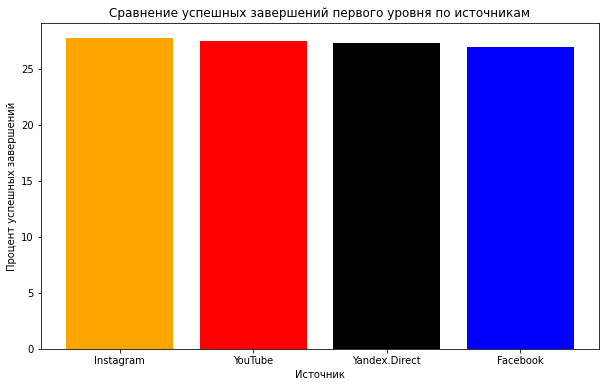

In [14]:
# Источники и соответствующие им проценты успешных завершений
sources = ['Instagram', 'YouTube', 'Yandex.Direct', 'Facebook']
success_rates = [27.72, 27.44, 27.30, 26.95]

# Цвета для каждого источника
colors = ['orange', 'red', 'black', 'blue']

# Создание нового графика
plt.figure(figsize=(10, 6))

# Построение столбчатой диаграммы с указанием цветов
plt.bar(sources, success_rates, color=colors)

# Заголовок графика
plt.title('Сравнение успешных завершений первого уровня по источникам')

# Название оси X
plt.xlabel('Источник')

# Название оси Y
plt.ylabel('Процент успешных завершений')

# Отображение графика
plt.show()

### Шаг 5. Проверка статистических гипотез

- Гипотеза 1: Время завершения уровня различается в зависимости от способа прохождения: через реализацию проекта и через победу над первым игроком.

Нулевая гипотеза (H0): Средние времена завершения уровня одинаковы для обоих способов.
Альтернативная гипотеза (H1): Средние времена завершения уровня различаются для способов.
Провести t-тест для сравнения средних времен завершения.

- Гипотеза 2: Среднее количество событий в игре различается в зависимости от источника, с которого пришел пользователь.

Нулевая гипотеза (H0): Средние количество событий одинаково для всех источников.
Альтернативная гипотеза (H1): Средние количество событий различается в зависимости от источника.
Провести статистический тест (t-тест) для сравнения средних количеств событий.

**Гипотеза 1**

In [15]:
# Создание выборок для теста
project_completion_time = merged_data[merged_data['project_type'] == 'project']['event_datetime']
victory_completion_time = merged_data[merged_data['project_type'] == 'victory']['event_datetime']

# Преобразование времени в числовой формат
project_completion_time_numeric = pd.to_datetime(project_completion_time).astype('int64')
victory_completion_time_numeric = pd.to_datetime(victory_completion_time).astype('int64')

# Проведение t-теста
t_statistic, p_value = ttest_ind(project_completion_time_numeric, victory_completion_time_numeric, equal_var=False)

# Установка уровня значимости
alpha = 0.05

# Вывод результатов теста
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние времена завершения различаются.")
else:
    print("Не получилось отвергнуть нулевую гипотезу: средние времена завершения одинаковы.")

Не получилось отвергнуть нулевую гипотезу: средние времена завершения одинаковы.


На основе проведенного t-теста недостаточно данных, чтобы утверждать, что средние времена завершения уровня различаются в зависимости от способа прохождения (через реализацию проекта или победу над первым игроком). В данной ситуации нулевая гипотеза остается в силе: средние времена завершения уровня одинаковы для обоих способов.

In [16]:
merged_data.query('user_id == "c07b1c10-f477-44dc-81dc-ec82254b1347"')

,event_datetime,event,building_type,user_id,project_type,source
7,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,facebook_ads
8,2020-05-06 23:49:25,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,facebook_ads
9,2020-05-07 03:56:30,building,spaceport,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,facebook_ads
10,2020-05-07 07:58:20,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,facebook_ads
11,2020-05-07 08:30:13,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,facebook_ads
12,2020-05-09 09:30:40,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,facebook_ads
13,2020-05-10 02:18:34,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,facebook_ads
14,2020-05-11 23:16:25,building,research_center,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,facebook_ads
15,2020-05-12 04:26:44,building,research_center,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,facebook_ads
16,2020-05-13 05:45:37,building,spaceport,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,facebook_ads


In [17]:
researcher_user_id = 'c07b1c10-f477-44dc-81dc-ec82254b1347'
researcher_actions = merged_data.query(f'user_id == "{researcher_user_id}"')

# Вывод действий исследователя
print("Действия пользователя-исследователя:")
print(researcher_actions)

Действия пользователя-исследователя:
        event_datetime             event    building_type  \
7  2020-05-04 00:00:03          building    assembly_shop   
8  2020-05-06 23:49:25          building    assembly_shop   
9  2020-05-07 03:56:30          building        spaceport   
10 2020-05-07 07:58:20          building    assembly_shop   
11 2020-05-07 08:30:13          building    assembly_shop   
12 2020-05-09 09:30:40          building    assembly_shop   
13 2020-05-10 02:18:34          building    assembly_shop   
14 2020-05-11 23:16:25          building  research_center   
15 2020-05-12 04:26:44          building  research_center   
16 2020-05-13 05:45:37          building        spaceport   
17 2020-05-13 06:53:03           project              NaN   
18 2020-05-14 07:07:27          building        spaceport   
19 2020-05-15 05:29:13  finished_stage_1              NaN   

                                 user_id                project_type  \
7   c07b1c10-f477-44dc-81dc-ec82254b

Мы видим, какие события происходили, какие типы зданий строились, исследования завершались и т.д. В данном случае, исследователь начал события с построек, затем проект, и, наконец, завершил первый уровень.

**Гипотеза 2**

In [18]:
# Группировка данных по источнику и подсчет количества событий для каждого источника
events_per_source = merged_data.groupby('source')['event'].count()

# Создание выборок данных для каждого источника
source_1 = merged_data[merged_data['source'] == 'source_1']['event']
source_2 = merged_data[merged_data['source'] == 'source_2']['event']

# Проведение t-теста для сравнения средних количеств событий между source_1 и source_2
t_statistic, p_value = ttest_ind(source_1, source_2, equal_var=False)

# Уровень значимости (обычно 0.05)
alpha = 0.05

# Проверка p-value на соответствие уровню значимости
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние количество событий различается в зависимости от источника.")
else:
    print("Не получилось отвергнуть нулевую гипотезу: средние количество событий одинаково для всех источников.")

Не получилось отвергнуть нулевую гипотезу: средние количество событий одинаково для всех источников.


На основе имеющихся данных нельзя утверждать, что средние количество событий различается в зависимости от источника, с которого пришел пользователь. В данном случае, нулевая гипотеза остается в силе, и мы не обнаружили статистически значимой разницы в средних количествах событий между разными источниками трафика.

**В ходе анализа рекламных источников в игре "Космические братья" были получены следующие ключевые выводы:**

- Предпочтения по типу построенных объектов: Большинство игроков предпочитают строить объекты типа 'spaceport', за которыми следует 'assembly_shop'. Количество построенных объектов типа 'research_center' оказалось наименьшим.

- Уникальные пользователи: В исследовательском анализе было выявлено, что в игре "Космические братья" приняло участие 13576 уникальных пользователей, что представляет количество различных игроков, взаимодействовавших с игрой в данном периоде.

- Динамика активности пользователей: Построена гистограмма распределения событий по времени, которая позволила выявить динамику активности пользователей. Количество событий достигло пика к 10 маю и постепенно снижалось.

- Анализ эффективности источников перехода: Проведенный анализ распределения пользователей по различным источникам позволил выявить наиболее привлекательные каналы для привлечения пользователей. Наибольшее количество пользователей пришло из источника 'yandex_direct', что делает его наиболее востребованным. Следом идут 'instagram_new_adverts' и 'facebook_ads'. Также стоит отметить, что источник 'youtube_channel_reklama' также привлек значительное количество пользователей.

- Успешное завершение первого уровня: Анализ данных по успешному завершению первого уровня показал, что наибольший процент успешного завершения уровня наблюдается у пользователей, пришедших из источников Instagram, YouTube и Yandex.Direct. Это может указывать на более эффективные рекламные кампании в этих источниках.

- Оценка стоимостей привлечения пользователей по каналам: Самой дорогой канал рекламы является Facebook Ads со средней стоимостью привлечения одного пользователя равной 0,79. Вторым по дороговизне каналом рекламы является Instagram Ads со средней стоимостью привлечения одного пользователя равной 0,65. Третьим по дороговизне каналом рекламы является Yandex.Direct со средней стоимостью привлечения одного пользователя равной 0,46. Самым дешевым каналом рекламы является YouTube Channel Reklama со средней стоимостью привлечения одного пользователя равной 0,40.

**Возможные рекомендации для компании на основе полученных результатов:**

- Оптимизация рекламных источников: Рекомендуется провести дополнительное исследование эффективности рекламных каналов для точного определения приоритетов. Исходя из проведенного анализа, следует уделить особое внимание каналам 'yandex_direct', 'instagram_new_adverts', 'facebook_ads' и 'youtube_channel_reklama', так как именно они продемонстрировали наилучшие результаты в привлечении пользователей. Канал 'yandex_direct' является наиболее выгодным и привлекательным среди остальных. Однако для оптимизации рекламных затрат важно продолжать тестирование различных источников и внимательно отслеживать их конверсию в успешные завершения уровней.

- Улучшение вовлеченности пользователей: С учетом анализа поведения игроков, стоит уделить внимание уровням с наименьшей активностью. Возможно, стоит внести изменения в дизайн уровней или предложить бонусные возможности для увеличения участия игроков. Регулярные обновления контента также помогут поддерживать интерес пользователей и стимулировать их активность.

- Анализ успешных источников завершения уровней: Рекомендуется продолжать анализировать источники, из которых пользователи успешно завершают уровни. Это позволит определить, какие источники трафика наиболее эффективны для привлечения игроков с высокой вовлеченностью.

- Оптимизация времени завершения уровней: На основе результатов t-теста следует дополнительно исследовать факторы, влияющие на время завершения уровней. Возможно, стоит улучшить баланс сложности уровней или предоставить дополнительные подсказки пользователям.

- Персонализация маркетинговых кампаний: Используя информацию о типах построенных зданий и завершенных проектах, компания может персонализировать рекламные кампании и предложения для разных групп пользователей. Это может включать предложения о скидках на строительство определенных типов зданий.

- Монетизация игры: Анализ поведения игроков и успешных источников завершения уровней может помочь разработать эффективные стратегии монетизации, например, предлагать преимущества для игроков, завершивших уровни через реализацию проекта.

- Анализ новых источников трафика: При появлении новых рекламных источников рекомендуется провести анализ их эффективности и влияния на поведение пользователей. Это поможет определить, стоит ли инвестировать в эти источники и какие результаты они могут принести.

Обобщая, анализ данных предоставляет ценные инсайты для оптимизации рекламных кампаний, улучшения участия и вовлеченности игроков, а также эффективности монетизации. Рекомендации могут быть использованы для улучшения игрового продукта и повышения его привлекательности для пользователей, что, в свою очередь, может способствовать росту доходов компании.
